In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#importing required modules!


In [29]:
Data = pd.read_csv(r"philadelphiacrimedata/crime.csv")
#relative path for .csv file.

Sort the data with date of the crime

In [30]:
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data.Dispatch_Date_Time = Dat
Data.sort_values(by='Dispatch_Date_Time', inplace=True)
Data.index = np.array(range(Data.shape[0]))
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['all_hour'] = abs(Dat - Dat[0]).dt.total_seconds() / 3600.0

lets find number of crimes happend per year,per month and by days.

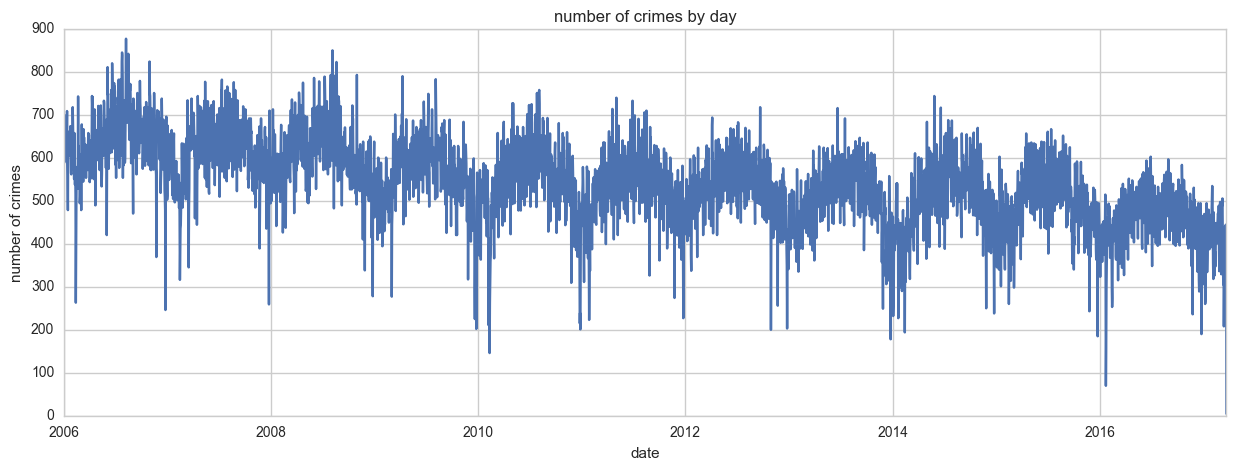

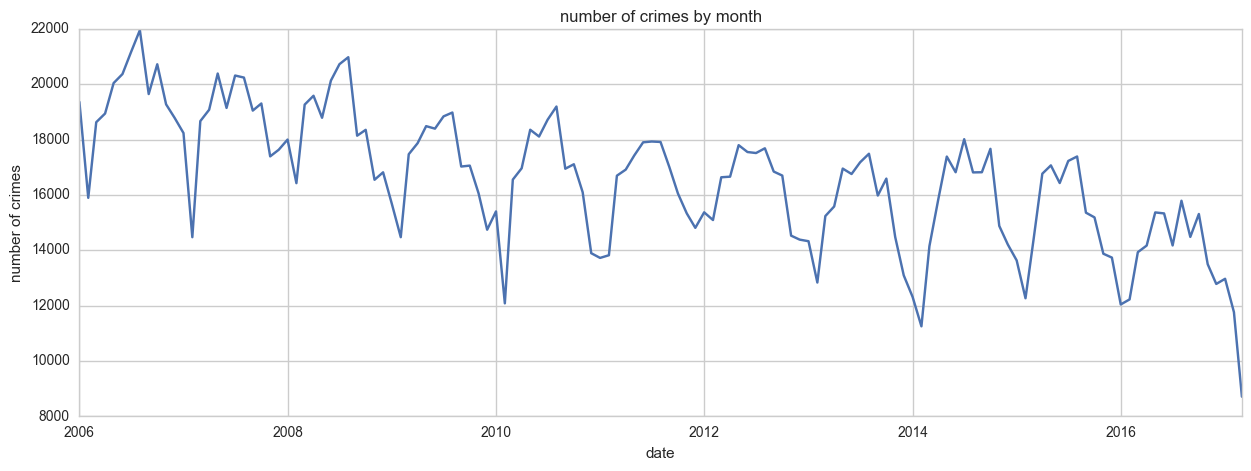

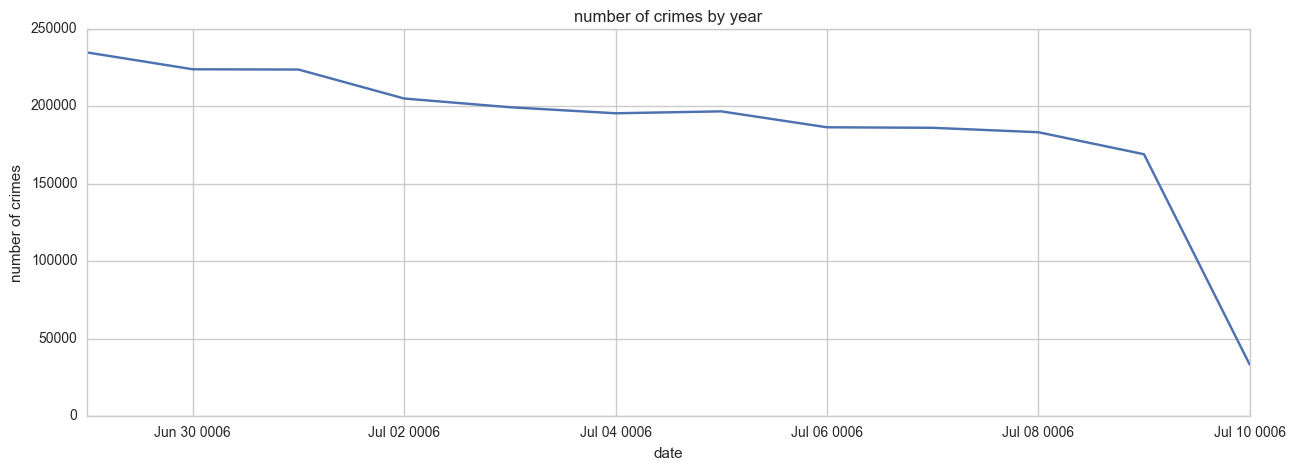

In [32]:
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['month'] = Dat.dt.month
Data['year'] = Dat.dt.year
Data['day'] = Dat.dt.day
Group = Data.groupby(['year', 'month', 'day'])['day'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(Data.Dispatch_Date.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by day')

Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['month'] = Dat.dt.month
Data['year'] = Dat.dt.year
Group = Data.groupby(['year', 'month'])['month'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(Data.Month.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by month')

Group = Data.groupby(['year'])['year'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(Data.year.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by year')

Graph describes the crime incidents on day basis. This graph clearly shows us that number of crimes are more in summer than any other season. If you see year wise the rate of crimes are decresing.

lets do analysis on how crime rates are changing in Police-districts in every year.

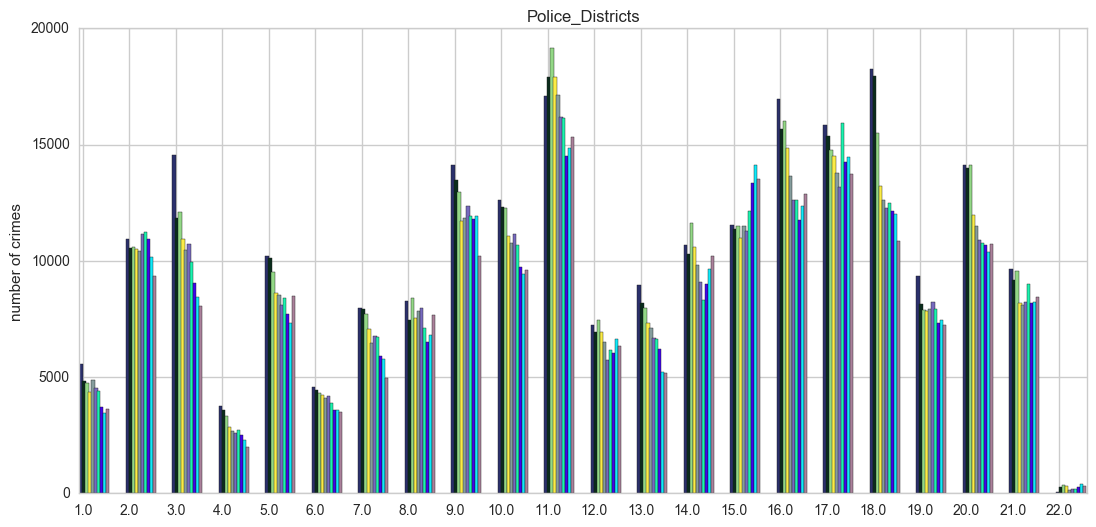

In [33]:
color = np.random.rand( Data.Police_Districts.value_counts(sort = False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 6
for i in range(2006, 2016): 
    crimes = np.array( Data.Police_Districts[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Police_Districts')
    plt.xticks(ind+width, Data.Police_Districts[Data.year == 2006].value_counts(sort= False).index)
    plt.axis([0, 26, 0.0, 20000])
    c += 1

plt.show()

It is evident that places with police stations the number of crimes have dropped down.
But there are few instances the rate also increased.

Now, lets find how the crime rates change for each text_general-code.

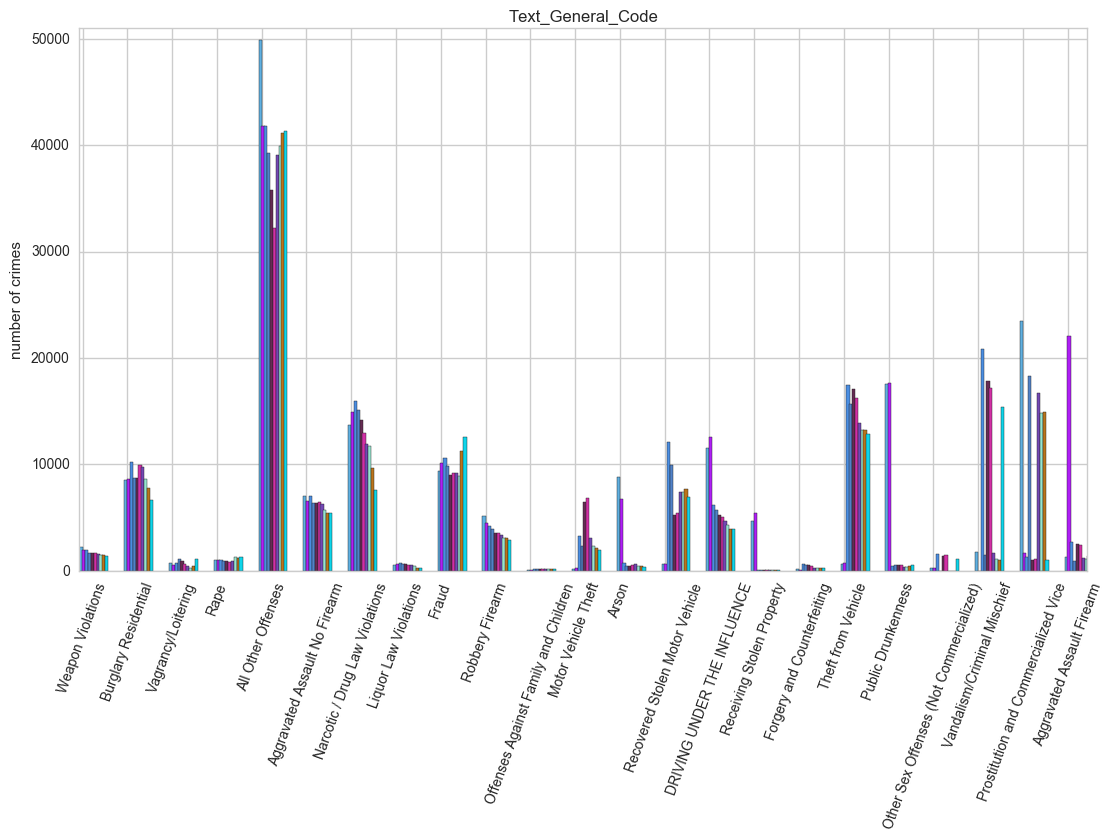

In [34]:
color = np.random.rand( Data.Text_General_Code.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array( Data.Text_General_Code[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Text_General_Code')
    plt.xticks(ind+width, Data.Text_General_Code[Data.year == i].value_counts(sort= False).index, rotation = 70)
    plt.axis([0, 27, 0.0, 51000])
    c += 1

plt.show()

Lets deep drill how the crime rate changes each month for every year!!

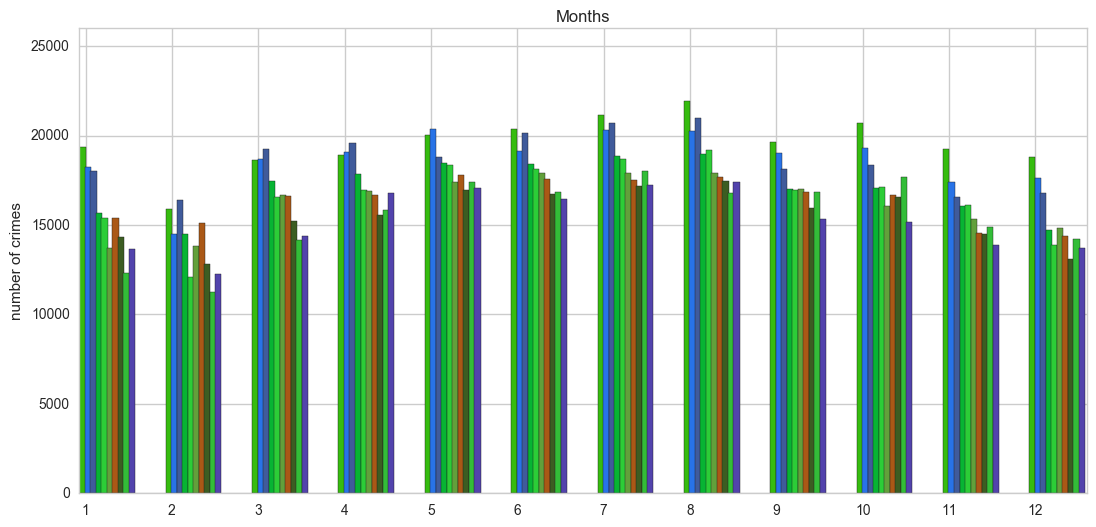

In [35]:
color = np.random.rand( Data.month.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 6
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array( Data.month[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Months')
    plt.xticks(ind+width, Data.month[Data.year == i].value_counts(sort= False).index)
    plt.axis([0, 14, 0.0, 26000])
    c += 1

plt.show()

Again summer is in the hit list.
If you combine this observation with the text general-code graphs----> It is evident that the all forms of crimes are going high in the summer time frame when compared to the winter or any other time frame .

We have a conclusion that summer is the hit time for majority of crimes in all the years. Now further deep drill down the x axis co ordinates to timestamp. Which means finding the rate of crimes on hourly basis for all the years.

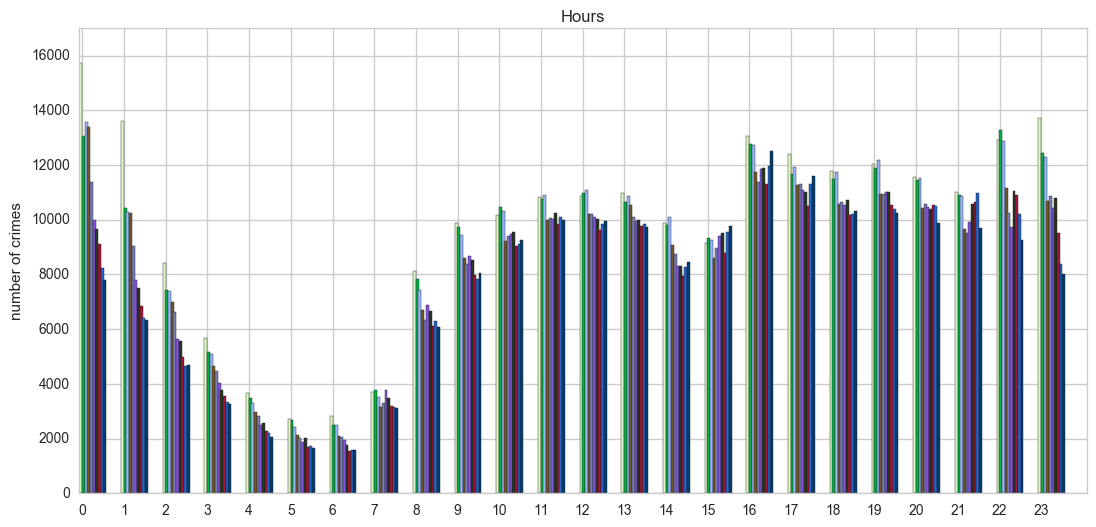

In [36]:
color = np.random.rand( Data.Hour.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 6
fig, ax = plt.subplots()
for i in range(2006, 2016):  
    crimes = np.array( Data.Hour[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Hours')
    plt.xticks(ind+width, Data.Hour[Data.year == i].value_counts(sort= False).index)
    plt.axis([0, 29, 0.0, 17000])
    c += 1

plt.show()

FOr all the years it is clear that crime rates are less in 3.00pm to 7.00pm timestamps.

If you take in 2006 and 2015, the crime rate at mid night hours has been drastically dropeed down.Which a good sign. there would have been proper actions from running governments.